In [2]:
import os
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '1d6926543349403091078f8b44094a81')
results = search_images_bing(key, 'phone')
ims = results.attrgot('contentUrl')
len(ims)

150

In [4]:
dest = 'images/phone.jpg'
download_url(ims[0], dest)

Path('images/phone.jpg')

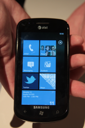

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
phone_types = 'samsung','apple','huawei','nokia'
path = Path('phones')

In [7]:
if not path.exists():
    path.mkdir()
    for o in phone_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} phone')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(path)
fns

(#539) [Path('phones/samsung/00000140.jpg'),Path('phones/samsung/00000058.jpg'),Path('phones/samsung/00000002.png'),Path('phones/samsung/00000072.jpg'),Path('phones/samsung/00000045.jpg'),Path('phones/samsung/00000069.jpg'),Path('phones/samsung/00000078.jpg'),Path('phones/samsung/00000096.jpg'),Path('phones/samsung/00000100.jpg'),Path('phones/samsung/00000023.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink);

In [11]:
phones = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = phones.dataloaders(path)

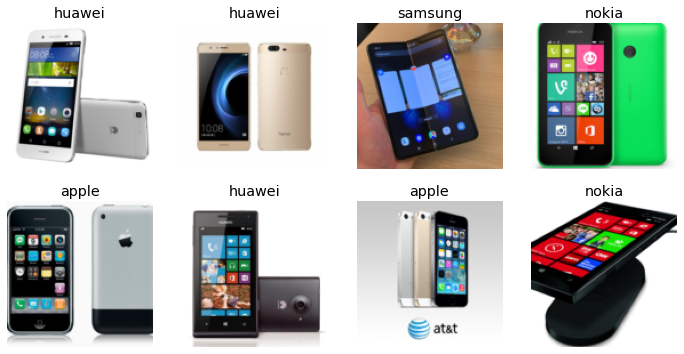

In [13]:
dls.valid.show_batch(max_n=8, nrows=2)


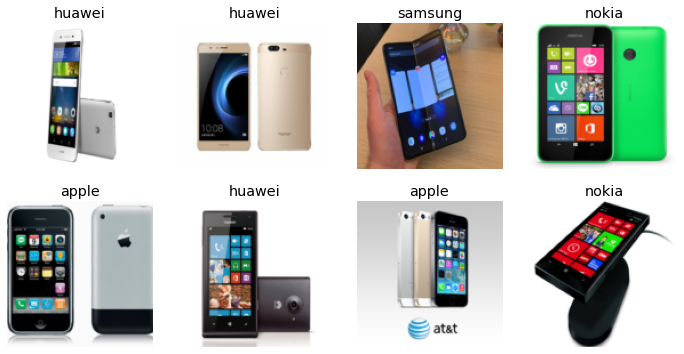

In [18]:
phones = phones.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = phones.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

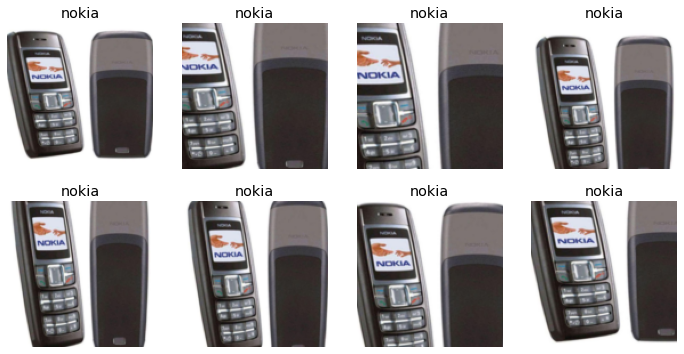

In [19]:
phones = phones.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = phones.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1643156123019/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:758.)
  ret = func(*args, **kwargs)


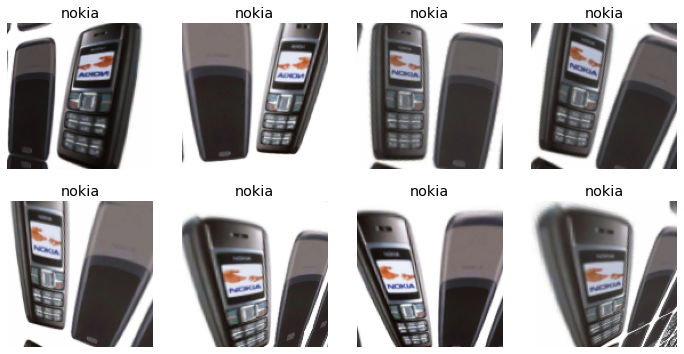

In [20]:
phones = phones.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = phones.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [10]:
phones = phones.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = phones.dataloaders(path)

/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1643156123019/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:758.)
  ret = func(*args, **kwargs)


In [22]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.320474,1.285751,0.514019,02:03


/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.374448,1.051439,0.411215,04:29
1,1.235193,0.863881,0.271028,04:29
2,1.115210,0.944728,0.308411,04:31
3,0.929395,0.922665,0.308411,04:29
4,0.801957,0.824425,0.261682,04:34
5,0.708740,0.809584,0.280374,04:34


/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


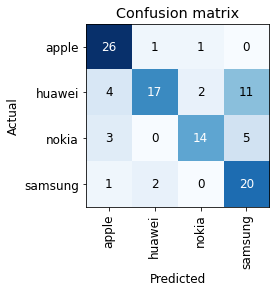

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

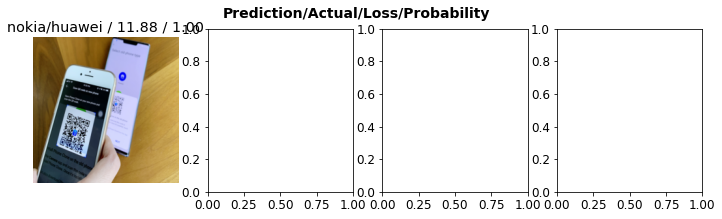

In [24]:
interp.plot_top_losses(4, nrows=1)

In [25]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [27]:
dls = phones.dataloaders(path)
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.227753,1.210544,0.457944,03:16


/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.381091,1.029815,0.383178,04:32
1,1.244699,0.874818,0.299065,04:25
2,1.080524,0.754170,0.271028,02:21
3,0.902765,0.704172,0.224299,02:20
4,0.779634,0.695324,0.224299,02:19
5,0.693743,0.699383,0.233645,02:27


/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


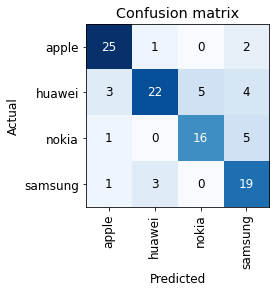

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
learn.export("phone.pkl")

In [4]:
path = Path("/home/ec2-user/SageMaker")
path.ls(file_exts='.pkl')

(#1) [Path('/home/ec2-user/SageMaker/phone.pkl')]

In [5]:
learn_inf = load_learner(path/'phone.pkl')

In [32]:
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')
btn_upload = widgets.FileUpload()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)



out_pl = widgets.Output()
VBox([widgets.Label('Select your phone!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.324158,1.864611,0.607477,01:50


/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.498524,1.219562,0.439252,02:16
1,1.212258,1.029758,0.336449,02:24
2,0.943689,0.957664,0.327103,02:19
3,0.783569,0.924029,0.317757,02:17
4,0.665651,0.892071,0.327103,02:26


/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ec2-user/anaconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
path="/home/ec2-user/SageMaker/phones/huawei/00000011.jpg"

In [23]:
img = PILImage.create(path)

In [24]:
x, = first(dls.test_dl([img]))

In [25]:
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [26]:
hook_output = Hook()
hook = learn.model[0].register_forward_hook(hook_output.hook_func)

In [27]:
with torch.no_grad(): output = learn.model.eval()(x)

In [28]:
act = hook_output.stored[0]

In [29]:
F.softmax(output, dim=-1)

TensorBase([[2.1965e-02, 9.5299e-01, 1.3589e-04, 2.4913e-02]])

In [30]:
dls.vocab

['apple', 'huawei', 'nokia', 'samsung']

In [31]:
x.shape

torch.Size([1, 3, 128, 128])

In [32]:
cam_map = torch.einsum('ck,kij->cij', learn.model[1][-1].weight, act)
cam_map.shape

torch.Size([4, 4, 4])

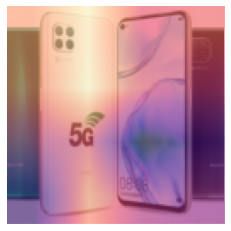

In [33]:
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map[1].detach().cpu(), alpha=0.6, extent=(0,128,128,0),
              interpolation='bilinear', cmap='magma');

In [34]:
hook.remove()

In [35]:
from torch.multiprocessing import Pool, Process, set_start_method
try:
     set_start_method('spawn')
except RuntimeError:
    pass

In [36]:
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [40]:
import torch

print(torch.__version__)
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device="cpu")
print(my_tensor)
torch.cuda.is_available()

1.10.1
tensor([[1., 2., 3.],
        [4., 5., 6.]])


False

In [37]:
with Hook(learn.model[0]) as hook:
    with torch.no_grad(): output = learn.model.eval()(x.cuda())
    act = hook.stored

AssertionError: Torch not compiled with CUDA enabled

In [96]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)   
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [103]:
cls = 1
with HookBwd(learn.model[0]) as hookg:
    with Hook(learn.model[0]) as hook:
        output = learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

AssertionError: Torch not compiled with CUDA enabled